In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

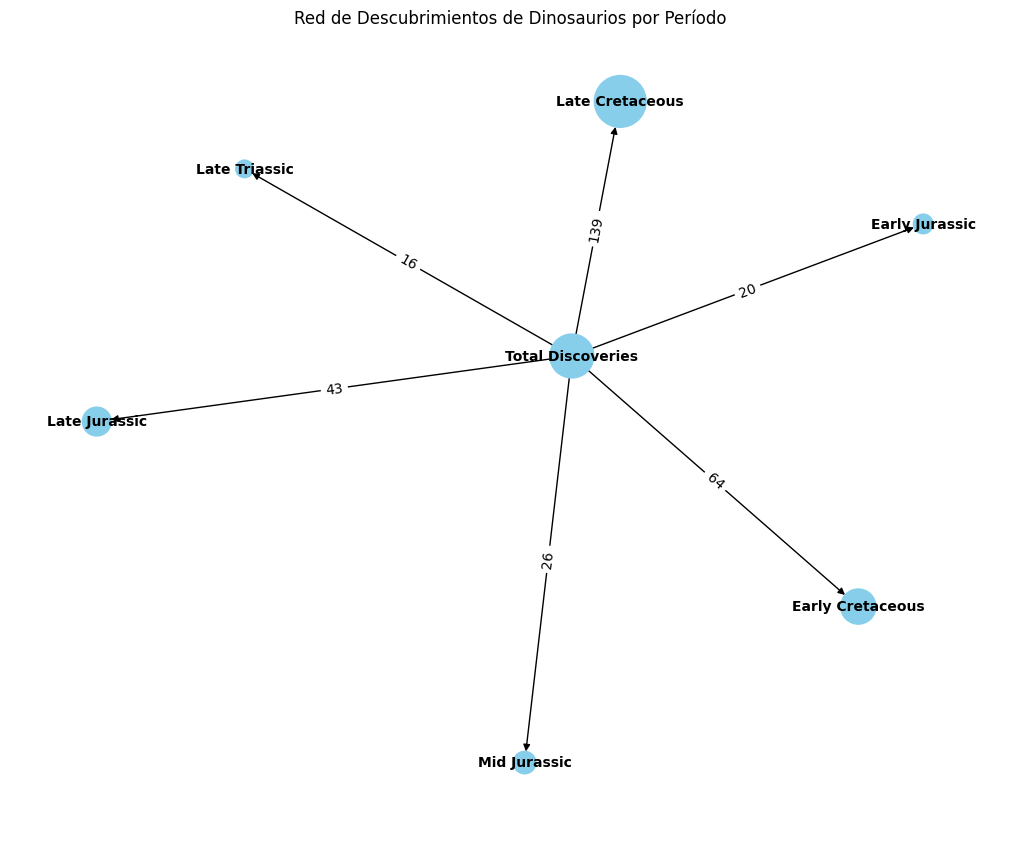

In [15]:
url = 'https://github.com/ricardoramos12/30daychartchallenge/raw/refs/heads/main/Day17-Network/dataset.csv'
data = pd.read_csv(url)

filtered_data = data[['period']].copy()

# Procesar el nombre del periodo
filtered_data['period'] = filtered_data['period'].apply(lambda x: ' '.join(x.split()[:2]))
filtered_data = filtered_data[filtered_data['period'] != 'USA']

# Contar ocurrencias de cada periodo
period_counts = filtered_data['period'].value_counts().reset_index()
period_counts.columns = ['period', 'count']

# Crear el grafo
G = nx.DiGraph()
total_discoveries = period_counts['count'].sum()
G.add_node("Total Discoveries", total=total_discoveries)

# Agregar nodos de periodos y conectar con el nodo central
for _, row in period_counts.iterrows():
    G.add_node(row['period'], total=row['count'])
    G.add_edge("Total Discoveries", row['period'], weight=row['count'])

# Definir posiciones y tamaños de nodos
pos = nx.spring_layout(G, k=0.5)
node_sizes = [1000 if node == "Total Discoveries" else G.nodes[node]['total'] * 10 for node in G.nodes]
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold')

# Etiquetas de las aristas con la cantidad de descubrimientos
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Red de Descubrimientos de Dinosaurios por Período")
plt.axis("off")

plt.show()